In [27]:
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import copy
%matplotlib inline
sys.path.append('../../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/sim_phase_space/symmetric/results'
    tline_path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    print('CAREFUL! NO EXTERNAL SSD!')
    path = './results'
    tline_path = '../../det_sols_from_polynomial/res_files'

In [23]:
model = 'Galla'
q1, q2, ic, N = 7.0, 10.0, 'N', 100

mesh_file = f'q1_{q1}_q2_{q2}_phase_space_{model}_ic_{ic}_Nbots_{N}.npz'
mesh = np.load(f'{path}/{mesh_file}')

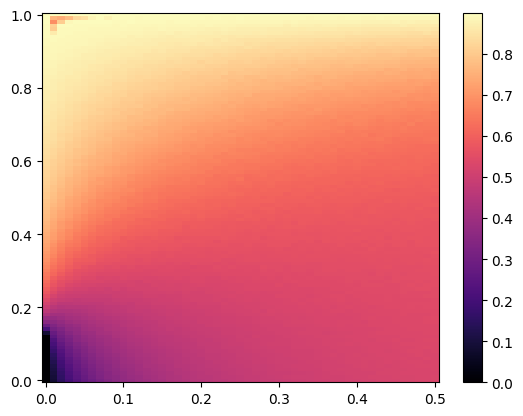

In [24]:
fig, ax = plt.subplots()
im = ax.pcolormesh(mesh['x'], mesh['y'], mesh['fs'][2], cmap='magma')
fig.colorbar(im)

0.0 0.3762413778


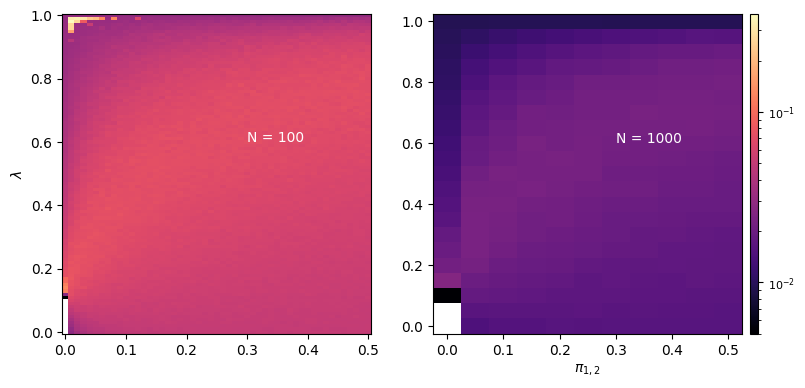

In [39]:
q1, q2, ic = 7.0, 10.0, 'N'
mesh = np.load(f'{path}/{mesh_file}')

fig, ax = plt.subplots(1,2, figsize=(8,4))

# search vmin, vmax:
# vmin, vmax = None, None
vmins, vmaxs = [], []
for N in [100, 1000]:
    mesh_file = f'q1_{q1}_q2_{q2}_phase_space_{model}_ic_{ic}_Nbots_{N}.npz'
    mesh = np.load(f'{path}/{mesh_file}')
    vminN, vmaxN = np.min(mesh['fs'][5]), np.max(mesh['fs'][5])
    # vmin = vminN if vmin == None or vminN < vmin else vminN
    # vmax = vmaxN if vmax == None or vmaxN > vmax else vminN
    vmins.append(np.min(mesh['fs'][5])), vmaxs.append(np.max(mesh['fs'][5]))

vmin, vmax = min(vmins), max(vmaxs)
print(vmin, vmax)
vmin = 5e-3

cmap = copy.copy(matplotlib.colormaps['magma'])
# cmap.set_bad(cmap.colors[0])
for i,N in enumerate([100, 1000]):
    mesh_file = f'q1_{q1}_q2_{q2}_phase_space_{model}_ic_{ic}_Nbots_{N}.npz'
    mesh = np.load(f'{path}/{mesh_file}')
    im = ax[i].pcolormesh(mesh['x'], mesh['y'], mesh['fs'][5], cmap=cmap, shading='nearest', norm = LogNorm(vmin, vmax))
    ax[i].text(0.3, 0.6, f'N = {N}', color='xkcd:white')
    # im = ax[i].pcolormesh(mesh['x'], mesh['y'], mesh['fs'][5], cmap='magma', shading='nearest', vmin=vmin, vmax=vmax)
ax[1].set_xlabel('$\pi_{1,2}$')
ax[0].set_ylabel('$\lambda$')

# Make some room for the colorbar
fig.subplots_adjust(left=0.07, right=0.92, bottom=0.125, top=0.925)
# Add the colorbar outside...
box = ax[1].get_position()
pad, width = 0.01, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=8)

fig.savefig(f'cmaps_sym_sdf2_varN_q1_{q1}_q2_{q2}.png')
